## In this notebook I will combined all the metabolic models built with `CarveMe` and `SMETANA` and explore the interactions present in each sample

In [2]:
# Import Libraries
from glob import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

#### The outputs that result from `SMETANA` provide a calculation of the Interaction Potential (or cooperation and competition) of the community and for each individual species

In [4]:
# I will return the sample name to each file of SMETANA interactions output
for file in os.listdir("../results/output/initial_simulations/"):
    if file.endswith(".tsv"):
        path = str("../results/output/initial_simulations/" + file)
        df = pd.read_csv(path, sep='\t')
        sample = file.replace("_global.tsv", "").replace("_detailed.tsv", "")
        df["sample"] = sample
        df.to_csv(path, sep='\t', index=False)

In [6]:
# And also will compile all the files into a long format file

# For SMETANA GLOBAL variable
column_names = ['community', 'medium', 'size', "mip", "mro", "sample"]

global_interactions = pd.DataFrame()

for filename in glob("../results/output/initial_simulations/*_global.tsv"):
                        global_interactions = pd.concat([global_interactions, pd.read_csv(filename, sep="\t", usecols=column_names)], axis=0)
global_interactions.sort_values("mro", ascending=False)

,community,medium,size,mip,mro,sample
0,all,complete,4,NaN,0.771930,2382.DPOO1.C1.HA.4.645.gp.9.12.lane8.NoIndex.L...
0,all,complete,4,NaN,0.753086,2229.S1.N11.EH5.Thomas.CMB.Seaweed.lane5.NoInd...
0,all,complete,3,1.0,0.744186,2382.SH008.C6.HA.5.749.leav.9.12.lane8.NoIndex...
0,all,complete,5,2.0,0.742857,1721.B3B
0,all,complete,10,8.0,0.738779,1883.2009.371.Crump.Artic.LTREB.main.lane3.NoI...
...,...,...,...,...,...,...
0,all,complete,6,10.0,0.542308,1721.B27T
0,all,complete,8,17.0,0.541154,894.OR334.lane3.NoIndex.L003
0,all,complete,10,NaN,0.530355,1773.Turdus.oliv1.lgi
0,all,complete,10,NaN,0.515556,2192.H03a.Hand.1258.lane5.NoIndex.L005


In [7]:
# For SMETANA DETAILED variables
column_names = ['community', 'medium', 'receiver', 'donor', 'compound', 'scs', 'mus', 'mps', 'smetana', 'sample']

detailed_interactions = pd.DataFrame()

for filename in glob("../results/output/initial_simulations/*_detailed.tsv"):
                        detailed_interactions = pd.concat([detailed_interactions, pd.read_csv(filename, sep="\t", usecols=column_names)], axis=0)
detailed_interactions

,community,medium,receiver,donor,compound,scs,mus,mps,smetana,sample
0,all,minimal,Flavobacterium_fluvii_DSM_19978_,Bacillus_circulans_NBRC_13626_,M_arg__L_e,0.25,0.03,1,0.0075,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...
1,all,minimal,Flavobacterium_fluvii_DSM_19978_,Bacillus_circulans_NBRC_13626_,M_etoh_e,0.25,0.25,1,0.0625,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...
2,all,minimal,Flavobacterium_fluvii_DSM_19978_,Bacillus_circulans_NBRC_13626_,M_fe2_e,0.25,0.75,1,0.1875,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...
3,all,minimal,Flavobacterium_fluvii_DSM_19978_,Bacillus_circulans_NBRC_13626_,M_fe3_e,0.25,0.24,1,0.0600,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...
4,all,minimal,Flavobacterium_fluvii_DSM_19978_,Bacillus_circulans_NBRC_13626_,M_fe3pyovd_kt_e,0.25,0.01,1,0.0025,1883.2009.289.Crump.Artic.LTREB.main.lane3.NoI...
...,...,...,...,...,...,...,...,...,...,...
117,all,minimal,Sphingomonas_taxi_ATCC_55669_,Pseudomonas_putida_PA14H7_,M_nh4_e,0.50,0.03,1,0.0150,2382.DPOO1.C1.HA.4.645.gp.9.12.lane8.NoIndex.L...
118,all,minimal,Sphingomonas_taxi_ATCC_55669_,Pseudomonas_putida_PA14H7_,M_orn_e,0.50,0.03,1,0.0150,2382.DPOO1.C1.HA.4.645.gp.9.12.lane8.NoIndex.L...
119,all,minimal,Sphingomonas_taxi_ATCC_55669_,Pseudomonas_putida_PA14H7_,M_pi_e,0.50,0.01,1,0.0050,2382.DPOO1.C1.HA.4.645.gp.9.12.lane8.NoIndex.L...
120,all,minimal,Sphingomonas_taxi_ATCC_55669_,Pseudomonas_putida_PA14H7_,M_ppap_e,0.50,0.35,1,0.1750,2382.DPOO1.C1.HA.4.645.gp.9.12.lane8.NoIndex.L...


In [157]:
#detailed_interactions.to_csv("./output/test/detailed_test.tsv", sep="\t", index=False)

### I will now merge the data sets and include the enviromental matter or material where the samples were collected

In [9]:
# Loading metadata
metadata = pd.read_csv("../data/emp_qiime_mapping_qc_filtered.tsv", sep="\t")

# change the name of columns
metadata.rename(columns={'#SampleID': 'sample'}, inplace=True)

In [10]:
# Extracting and Merging the interactions dataframes with ENVO's
sample_ids = set(global_interactions['sample'])
global_interactions_meta = metadata[metadata['sample'].isin(sample_ids)]

sample_ids = set(detailed_interactions['sample'])
detailed_interactions_meta = metadata[metadata['sample'].isin(sample_ids)]
detailed_interactions_meta
global_interactions_meta

,sample,BarcodeSequence,LinkerPrimerSequence,Description,host_subject_id,study_id,title,principal_investigator,doi,ebi_accession,...,adiv_shannon,adiv_faith_pd,temperature_deg_c,ph,salinity_psu,oxygen_mg_per_l,phosphate_umol_per_l,ammonium_umol_per_l,nitrate_umol_per_l,sulfate_umol_per_l
1678,662.M18,ACGAGACTGATT,GTGCCAGCMGCCGCGGTAA,Mytlius californianus siphon tissue M18,M18,662,The role of macrobiota in structuring microbia...,Catherine Pfister,10.7717/peerj.631,ERP020507,...,1.518668,3.729364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1793,678.seasonal.insitu.sample.491,TCACGGTGACAT,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from seasonal in situ s...,491,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,8.600108,128.232489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868,678.seasonal.insitu.sample.595,GCTCTAGTAACG,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from seasonal in situ s...,595,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,9.113077,141.322681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1869,678.seasonal.insitu.sample.596,GTGTACATAACG,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from seasonal in situ s...,596,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,8.905048,129.816746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,678.T.RFLP.Sample.821,GCAGAGAGGCTA,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from T-RFLP heterogenei...,821,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,8.825263,132.164441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23429,2382.SH008.C6.HA.5.749.leav.9.12.lane8.NoIndex...,CAATGTAGACAC,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,0.005092,1.854570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23623,2382.RU006.C181.RH.4.794.leav.9.12.lane8.NoInd...,ACCTTGACAAGA,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,0.439264,2.144020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23650,2382.RU006.C181.RH.1.779.leav.9.12.lane8.NoInd...,TTCTAGAGTGCG,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,0.018865,2.012197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23660,2382.MU002.C3.HA.5.699.leav.9.12.lane8.NoIndex...,AACGAGGCAACG,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,-0.000000,1.432725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# And Merging the data
global_interactions = pd.merge(global_interactions, global_interactions_meta,
                                      on='sample')

detailed_interactions = pd.merge(detailed_interactions, detailed_interactions_meta,
                                      on='sample')

In [12]:
g = detailed_interactions.groupby(['env_material', 'sample']).size().reset_index(name='samples')
g['env_material'].value_counts()

feces                10
soil                 10
fresh water           9
organic material      8
sand                  6
marine sediment       5
underground water     4
biofilm               3
excreta               3
mucus                 3
sebum                 3
travertine            3
sea water             2
Name: env_material, dtype: int64

In [13]:
# Loading samples with relative abundances
samples = pd.read_csv("../data/emp_150bp_filtered.tsv", sep="\t")
samples.rename(columns={'value': 'relat_abund'}, inplace=True)
samples

,sample,org_id,relat_abund
0,1001.SKB1,Acidovorax_konjaci_DSM_7481,0.004495
1,1001.SKB1,Acidovorax_soli_DSM_25157,0.000642
2,1001.SKB1,Acinetobacter_brisouii_CIP_110357,0.000161
3,1001.SKB1,Acinetobacter_indicus_CIP_110367,0.004495
4,1001.SKB1,Actinomadura_meyerae_DSM_44715,0.000642
...,...,...,...
1409250,990.KA3U.E.25,Verrucomicrobium_spinosum_DSM_4136_JCM_18804,0.000089
1409251,990.KA3U.E.25,Verrucosispora_sediminis_CGMCC_4_3550,0.000333
1409252,990.KA3U.E.25,Viridibacillus_arvi_DSM_16317,0.000011
1409253,990.KA3U.E.25,Williamsia_muralis_NBRC_105860,0.000022


In [14]:
comms_size = samples.groupby(['sample']).size().reset_index(name='community_size')
comms_size

,sample,community_size
0,1001.SKB1,266
1,1001.SKB2,253
2,1001.SKB3,273
3,1001.SKB4,292
4,1001.SKB5,251
...,...,...
12533,990.KA3U.E.20,275
12534,990.KA3U.E.21,149
12535,990.KA3U.E.22,255
12536,990.KA3U.E.24,246


In [92]:
global_interactions_meta = pd.merge(global_interactions_meta, comms_size, on='sample')
global_interactions_meta

,sample,BarcodeSequence,LinkerPrimerSequence,Description,host_subject_id,study_id,title,principal_investigator,doi,ebi_accession,...,adiv_faith_pd,temperature_deg_c,ph,salinity_psu,oxygen_mg_per_l,phosphate_umol_per_l,ammonium_umol_per_l,nitrate_umol_per_l,sulfate_umol_per_l,community_size
0,662.M18,ACGAGACTGATT,GTGCCAGCMGCCGCGGTAA,Mytlius californianus siphon tissue M18,M18,662,The role of macrobiota in structuring microbia...,Catherine Pfister,10.7717/peerj.631,ERP020507,...,3.729364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,678.seasonal.insitu.sample.491,TCACGGTGACAT,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from seasonal in situ s...,491,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,128.232489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2,678.seasonal.insitu.sample.595,GCTCTAGTAACG,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from seasonal in situ s...,595,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,141.322681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
3,678.seasonal.insitu.sample.596,GTGTACATAACG,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from seasonal in situ s...,596,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,129.816746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,678.T.RFLP.Sample.821,GCAGAGAGGCTA,GTGCCAGCMGCCGCGGTAA,Sediment DNA extracted from T-RFLP heterogenei...,821,678,Bioturbating shrimp alter the structure and di...,Bonnie Laverock,10.1038/ismej.2010.86,ERP017221,...,132.164441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2382.SH008.C6.HA.5.749.leav.9.12.lane8.NoIndex...,CAATGTAGACAC,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,1.854570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
74,2382.RU006.C181.RH.4.794.leav.9.12.lane8.NoInd...,ACCTTGACAAGA,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,2.144020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
75,2382.RU006.C181.RH.1.779.leav.9.12.lane8.NoInd...,TTCTAGAGTGCG,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,2.012197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
76,2382.MU002.C3.HA.5.699.leav.9.12.lane8.NoIndex...,AACGAGGCAACG,GTGCCAGCMGCCGCGGTAA,Leaves,HS7,2382,The soil microbiome influences grapevine-assoc...,Jack Gilbert,10.1128/mBio.02527-14,ERP006348,...,1.432725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


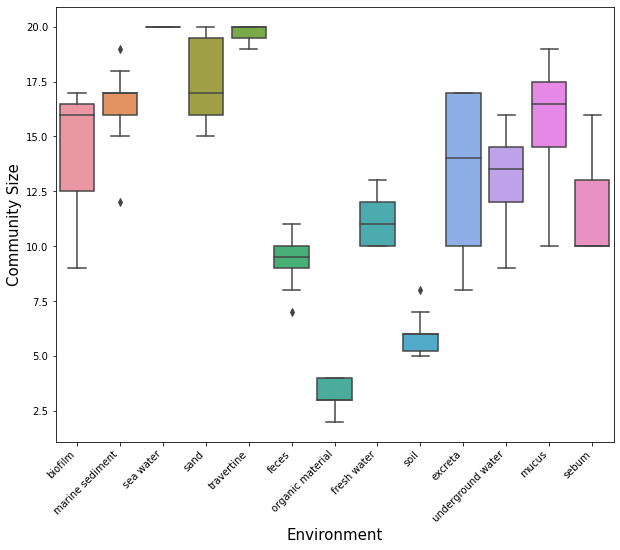

In [163]:
# Set the figure size
plt.figure(figsize=(10,8))

# Getting community size ordered
boxp = sns.boxplot(data=global_interactions_meta,
                   x = 'env_material',
                   y = 'community_size')
boxp.set_xticklabels(boxp.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Environment', fontsize=15)
plt.ylabel('Community Size', fontsize=15)
plt.show()

In [22]:
%matplotlib inline

(0.0, 1.5)

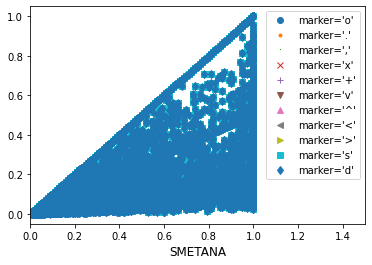

In [141]:
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(detailed_interactions['mus'], detailed_interactions['smetana'], marker, label="marker='{0}'".format(marker))
    plt.xlabel("MUS", fontsize=12)
    plt.xlabel("SMETANA", fontsize=12)
plt.legend(numpoints=1)
plt.xlim(0, 1.5)